In [87]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [9]:
data.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [13]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This also means that all the columns are numeric so there is no need for dummies

In [14]:
df = data[['TV', 'sales']]

In [15]:
df

,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5


In [16]:
x = df['TV']
y = df['sales']

In [17]:
x

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [18]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

<AxesSubplot:title={'center':'TV-Sales'}, xlabel='TV', ylabel='sales'>

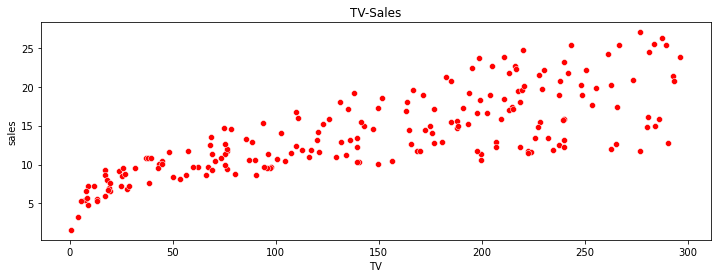

In [21]:
plt.figure(figsize=(12,4))
plt.title('TV-Sales')
sns.scatterplot(data=df, x='TV', y='sales', color='red')

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

lr model expects an array which consists of n_rows and n-features

In [25]:
x.shape

(200,)

In [26]:
y.shape

(200,)

In [29]:
x = x.values.reshape(-1, 1)

In [30]:
x.shape

(200, 1)

In [36]:
y = y.reshape(-1, 1)

In [38]:
y.shape

(200, 1)

Now that we have our x and y ready to be fitted let's split them

In [39]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [63]:
x_train.shape

(140, 1)

In [64]:
y_train.shape

(140, 1)

In [65]:
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(x_test)

In [67]:
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

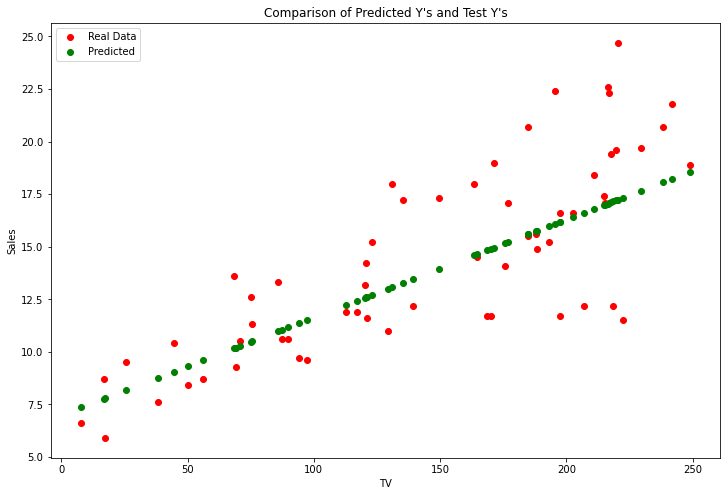

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Comparison of Predicted Y's and Test Y's")
plt.xlabel('TV')
plt.ylabel('Sales')

ax.scatter(x_test, y_test, color='red', label='Real Data')
ax.scatter(x_test, y_pred, color='green', label='Predicted')
plt.legend(loc='upper left')

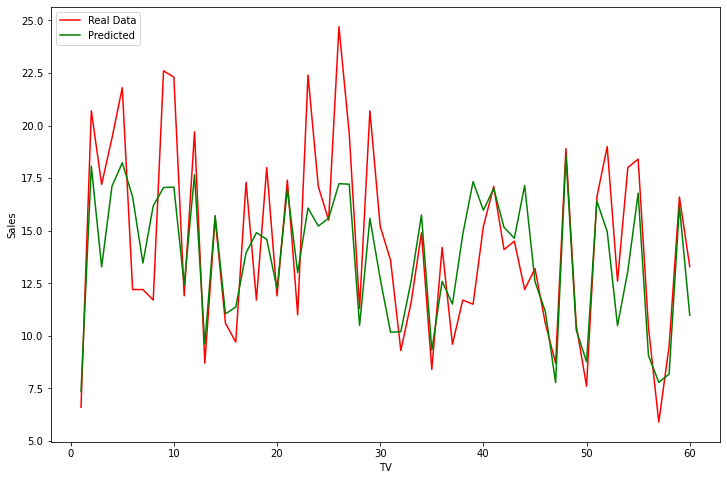

In [84]:
indexes = range(1, 61)

fig, ax = plt.subplots(figsize=(12,8))
plt.title
plt.xlabel('TV')
plt.ylabel('Sales')

ax.plot(indexes, y_test, color='red', label="Real Data")
ax.plot(indexes, y_pred, color='green', label="Predicted")
plt.legend(loc='upper left')

Let's also plot residuals themselves to see how accuarate we are visually

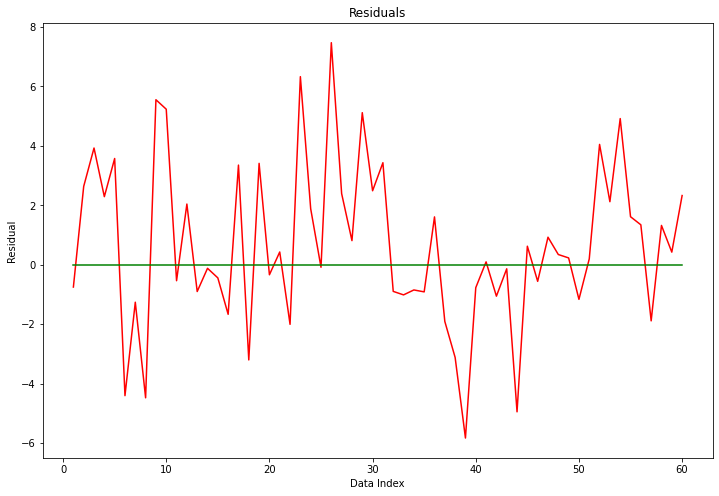

In [88]:
indexes = range(1, 61)
zeros = np.zeros(60)
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('Residual')


ax.plot(indexes, y_test - y_pred, color='red')
ax.plot(indexes, zeros, color='green')

In [95]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [91]:
r_2 = r2_score(y_test, y_pred)

In [92]:
r_2

0.5942987267783302

In [93]:
mse = mean_squared_error(y_test, y_pred)

In [94]:
mse

7.97579853285485

In [96]:
rmse = sqrt(mse)

In [97]:
rmse

2.8241456288327007

r2 score doesn't seem spectacular but with an rmse score such as this I think our model wasn't that bad at all, though it depends on the field of study